In [1]:
from Binaries import *

Assifier = HardwareClassifier()
TestEvents = EventGenerator("all", split = 1, real_background = False)

In [4]:
# Fetch all non-triggered traces within 1500m of core from vertical shower of >10^19 eV

non_triggered = []
start_time = perf_counter_ns()

for i, batch in enumerate(TestEvents):

    progress_bar(i, TestEvents.__len__(), start_time)

    try:

        if batch[0].Energy < 10**19 : continue

        for trace in batch:

            if trace.SPDistance >= 1500: continue

            # print("Potential trace:", trace, end = "... ")

            for window in trace:
                if Assifier(window): 
                    # print("triggered")
                    break
            else: 
                print(trace, "!!!")
                non_triggered.append(trace)

                if len(non_triggered) > 100: raise StopIteration
    
    except IndexError: pass
    except StopIteration: break


||                     SS                                             || 1.0500e+19 eV @ 1355 m from core    !!!
||                      X                                             || 1.3636e+19 eV @ 1470 m from core    !!!
||                     SS                                             || 1.0537e+19 eV @ 1430 m from core    !!!
||                     SS                                             || 1.2184e+19 eV @ 1484 m from core    !!!
||                     SS                                             || 1.0813e+19 eV @ 1425 m from core    !!!
||                      X                                             || 1.8560e+19 eV @ 1418 m from core    !!!
||                      X                                             || 1.0334e+19 eV @ 1453 m from core    !!!
||                     SS                                             || 1.5985e+19 eV @ 1451 m from core    !!!
||                     SS                                             || 1.1498e+19 eV @ 1481 m 

19
56.389 1.05005e+19 1355
62.5614 1.36365e+19 1470
63.0367 1.05366e+19 1430
57.3828 1.21841e+19 1484
62.4725 1.08127e+19 1425
61.9863 1.85597e+19 1418
63.4523 1.03336e+19 1453
57.4606 1.59846e+19 1451
64.6633 1.14985e+19 1481
60.9467 1.03726e+19 1440
54.2789 1.05967e+19 1409
63.6443 1.10395e+19 1382
59.977 1.11705e+19 1498
63.9995 1.14718e+19 1462
52.4117 1.03905e+19 1494
63.5414 1.03321e+19 1498
62.7793 1.56101e+19 1420
62.1784 1.29997e+19 1431
57.5698 1.17668e+19 1451


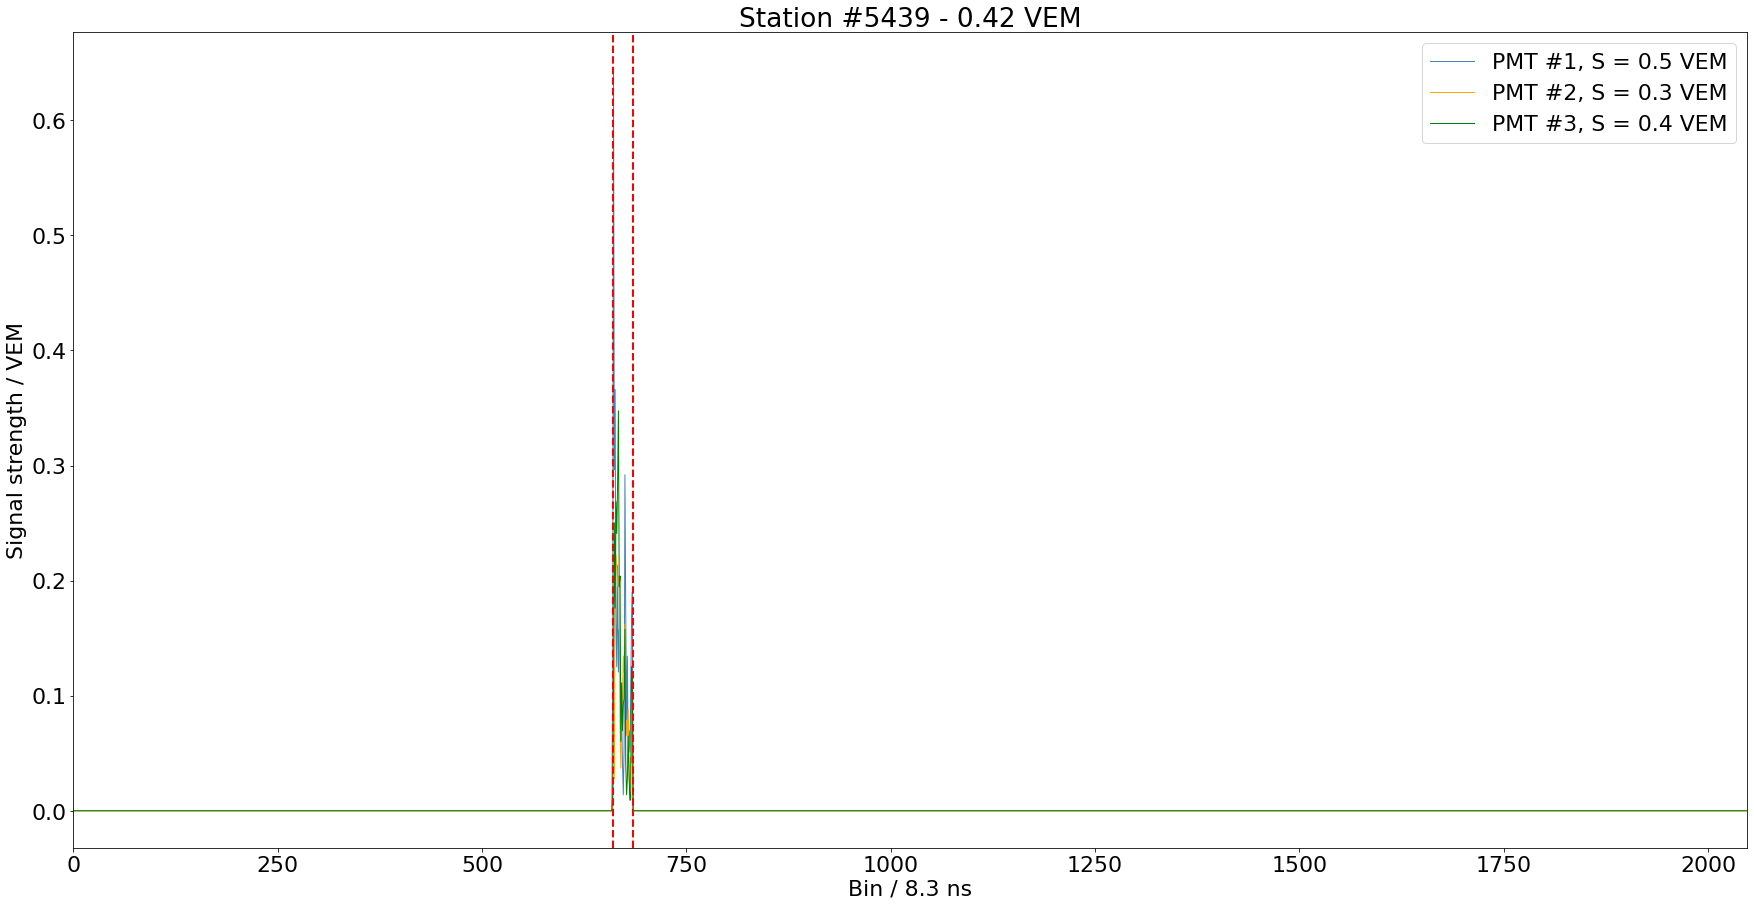

In [7]:
print(len(non_triggered))

for trace in non_triggered:
    print(trace.Zenith, trace.Energy, trace.SPDistance)

non_triggered[0].__plot__()

# Checking from generated datasets

In [ ]:
from Binaries import *

Assifier = NNClassifier("120_TwoLayer_FullBandwidth_NoCuts")
TP, FP, TN, FN = Assifier.load_and_print_performance("validation_data")

In [ ]:
triggered_shit, non_triggered_shit = [], []

for false_negative in FN:
    
    # cut on energy, zenith and SPD
    if false_negative[0] <= 1000 and false_negative[1] >= 10**19 and false_negative[2] <= 26:
        non_triggered_shit.append(false_negative)

for true_positive in TP:
    
    # cut on energy, zenith and SPD
    if true_positive[0] <= 1000 and true_positive[1] >= 10**19 and true_positive[2] <= 26:
        triggered_shit.append(true_positive)


In [ ]:
FN_all = np.loadtxt("/cr/data01/filip/models/120_TwoLayer_FullBandwidth_NoCuts/model_converged/ROC_curve/validation_data/false_negatives.csv", dtype = str)

for prediction in FN_all:
    f, id, spd, e, theta, mu, e, ph, i = prediction

    if (int(spd) <= 1000 and float(e) >= 1e19 and float(theta) <= 26):
        print(f, id, spd, e, theta, mu, e, ph, i)

## i think my binning is off...

In [ ]:
from Binaries import *

FN_all = np.loadtxt("/cr/data01/filip/models/120_TwoLayer_FullBandwidth_NoCuts/model_converged/ROC_curve/validation_data/false_negatives.csv", dtype = str)

energy, theta = [float(entry) for entry in FN_all[:, 3]], [float(entry) for entry in FN_all[:, 4]]
energy_bins = [10**16, 10**16.5, 10**17, 10**17.5, 10**18, 10**18.5, 10**19, 10**19.5]
theta_bins = [0, 33.56, 44.42, 51.32, 56.25, 60.00, 62.96, 65.37]

# energy = axis 1, theta = axis 2
misses_sorted = [[ [] for _ in range(len(theta_bins) - 1) ] for _ in range(len(energy_bins) - 1)]

In [ ]:
theta_indices = np.digitize(theta, theta_bins)
energy_indices = np.digitize(energy, energy_bins)

for t, e, prediction in zip(theta_indices, energy_indices, FN_all):
    misses_sorted[e - 1][t - 1].append([float(prediction[3]), float(prediction[4])])

#     misses_sorted[bin - 1].append(float(prediction[4]))

# for bin in misses_sorted:

#     print(len(bin))
#     _, _, _ = plt.hist(bin, bins = bins, histtype = "step")


# plt.xscale("log")

In [ ]:
for theta in misses_sorted[0]:

    _, _, _ = plt.hist(np.array(theta)[:, 1], bins = 10, histtype = "step")

plt.figure()

for energy in misses_sorted:

    flat_list = [item[0] for sublist in energy for item in sublist]

    _, _, _ = plt.hist(flat_list, bins = 30, histtype= "step")

plt.xscale("log")

In [ ]:
print(low_energy)

In [ ]:
AllEvents = EventGenerator(["17_17.5"], real_background = False, split = 1)
AllEvents.physics_test()
